In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
# read the dataset ------(Venkata Reddy)

df = pd.read_csv("D:\\reddy\\Project\\car_price_prediction_1.csv")

In [3]:
# Display the first few rows of the dataframe to understand its structure ------(Venkata Reddy)

df.head

<bound method NDFrame.head of             ID  Price  Levy   Manufacturer  Prod. year   Category  \
0     45654403  13328  1399          LEXUS        2010       Jeep   
1     44731507  16621  1018      CHEVROLET        2011       Jeep   
2     45802912  39493   891        HYUNDAI        2016       Jeep   
3     45656768   1803   761         TOYOTA        2010  Hatchback   
4     45816158    549   751        HYUNDAI        2013      Sedan   
...        ...    ...   ...            ...         ...        ...   
9126  45772306   5802  1055  MERCEDES-BENZ        2013      Sedan   
9127  45778856  15681   831        HYUNDAI        2011      Sedan   
9128  45804997  26108   836        HYUNDAI        2010       Jeep   
9129  45793526   5331  1288      CHEVROLET        2007       Jeep   
9130  45813273    470   753        HYUNDAI        2012      Sedan   

     Leather interior Fuel type  Engine    Mileage  Cylinders Gear box type  \
0                 Yes    Hybrid     3.5  186005 km          6 

In [4]:
# Gives information ------(Venkata Reddy)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9131 non-null   int64  
 1   Price             9131 non-null   int64  
 2   Levy              9131 non-null   int64  
 3   Manufacturer      9131 non-null   object 
 4   Prod. year        9131 non-null   int64  
 5   Category          9131 non-null   object 
 6   Leather interior  9131 non-null   object 
 7   Fuel type         9131 non-null   object 
 8   Engine            9131 non-null   float64
 9   Mileage           9131 non-null   object 
 10  Cylinders         9131 non-null   int64  
 11  Gear box type     9131 non-null   object 
 12  Drive wheels      9131 non-null   object 
 13  Wheel             9131 non-null   object 
 14  Airbags           9131 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 1.0+ MB


In [5]:
# Gives the datatypes of the variables ------(Venkata Reddy)

df.dtypes

ID                    int64
Price                 int64
Levy                  int64
Manufacturer         object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine              float64
Mileage              object
Cylinders             int64
Gear box type        object
Drive wheels         object
Wheel                object
Airbags               int64
dtype: object

In [6]:
# Gives Description of the dataset ------(Venkata Reddy)
df.describe()

,ID,Price,Levy,Prod. year,Engine,Cylinders,Airbags
count,9.131000e+03,9131.000000,9131.000000,9131.000000,9131.000000,9131.000000,9131.000000
mean,4.569227e+07,17518.859271,916.085095,2013.240061,2.380156,4.562260,7.143029
std,3.908874e+05,17409.158443,459.725935,2.898498,0.876934,1.160945,4.371635
min,3.510881e+07,1.000000,87.000000,1993.000000,0.000000,1.000000,0.000000
25%,4.573204e+07,3763.000000,640.000000,2011.000000,1.800000,4.000000,4.000000
50%,4.577287e+07,14113.000000,781.000000,2013.000000,2.000000,4.000000,4.000000
75%,4.580330e+07,23712.500000,1077.000000,2015.000000,2.500000,4.000000,12.000000
max,4.581665e+07,254024.000000,11714.000000,2020.000000,6.200000,14.000000,16.000000


In [7]:
# calcuating the manuafcurer count  ------(Venkata Reddy)
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3540
TOYOTA           2586
MERCEDES-BENZ    1128
CHEVROLET         985
LEXUS             892
Name: count, dtype: int64

# Data Cleaning

In [8]:
# checking null values in the data frame   ------(Venkata Reddy)
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine              0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Airbags             0
dtype: int64

##### The dataset has no missing values 

In [9]:
# Convert 'Mileage' to numeric (removing " km")   ------(Venkata Reddy)
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

### Univariate Analysis

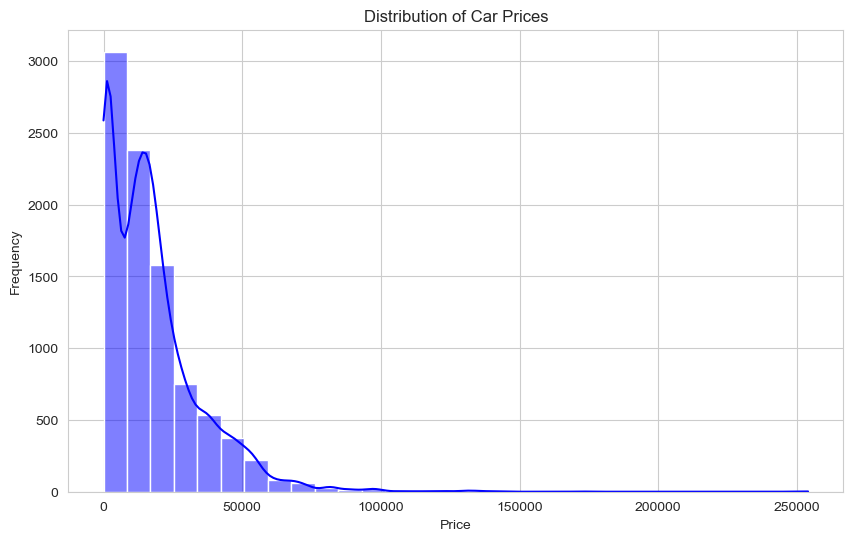

In [10]:
# plot of Distribution of car prices   ------(Venkata Reddy)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate graph for the response variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

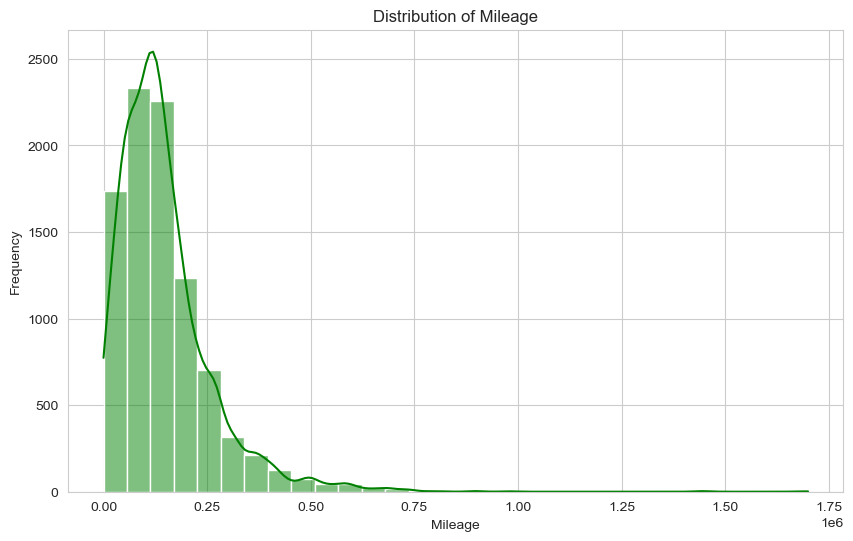

In [11]:
# plot of Distribution of Mileage    ------(Venkata Reddy)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate graph for the Mileage
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=30, kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

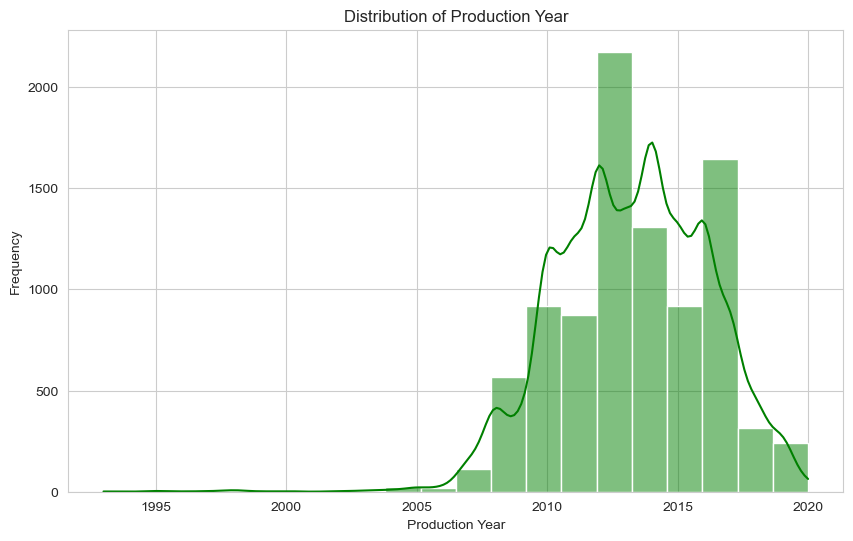

In [12]:
# plot of Distribution of Production Year      ------(Venkata Reddy)

plt.figure(figsize=(10, 6))
sns.histplot(df['Prod. year'], bins=20, kde=True, color='green')
plt.title('Distribution of Production Year')
plt.xlabel('Production Year')
plt.ylabel('Frequency')
plt.show()

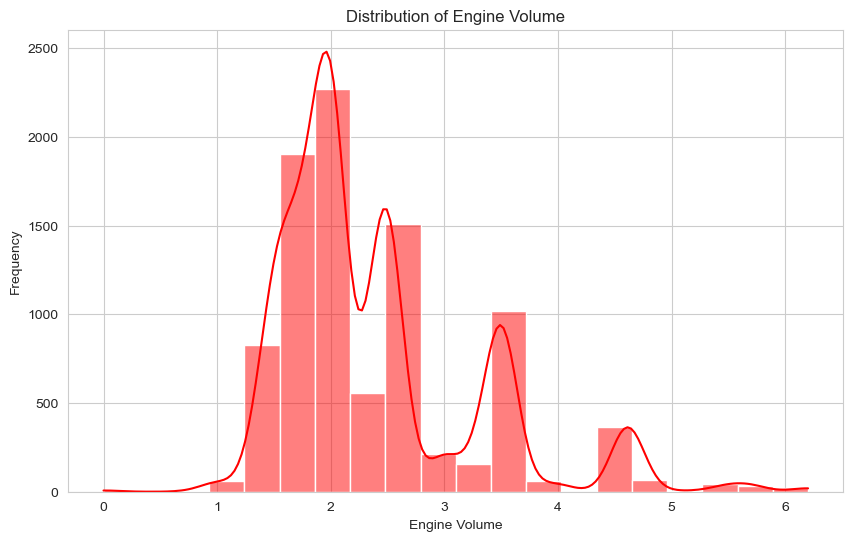

In [13]:
# plot of Distribution of Engine Volume        ------(Venkata Reddy)

plt.figure(figsize=(10, 6))
sns.histplot(df['Engine'], bins=20, kde=True, color='red')
plt.title('Distribution of Engine Volume')
plt.xlabel('Engine Volume')
plt.ylabel('Frequency')
plt.show()


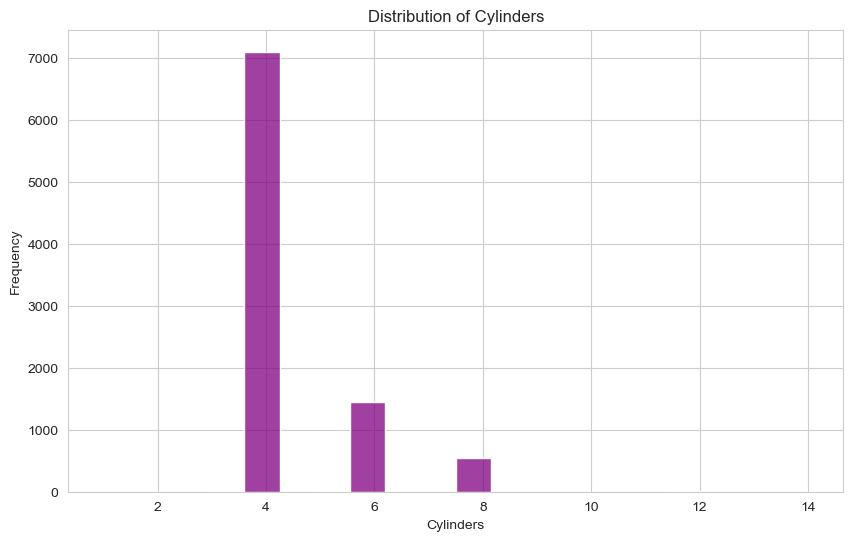

In [14]:
# plot of Distribution of Cylinders        ------(Venkata Reddy)

plt.figure(figsize=(10, 6))
sns.histplot(df['Cylinders'], bins=20, kde=False, color='purple')
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()


### Univariate Graphs for Categorical Explanatory Variables


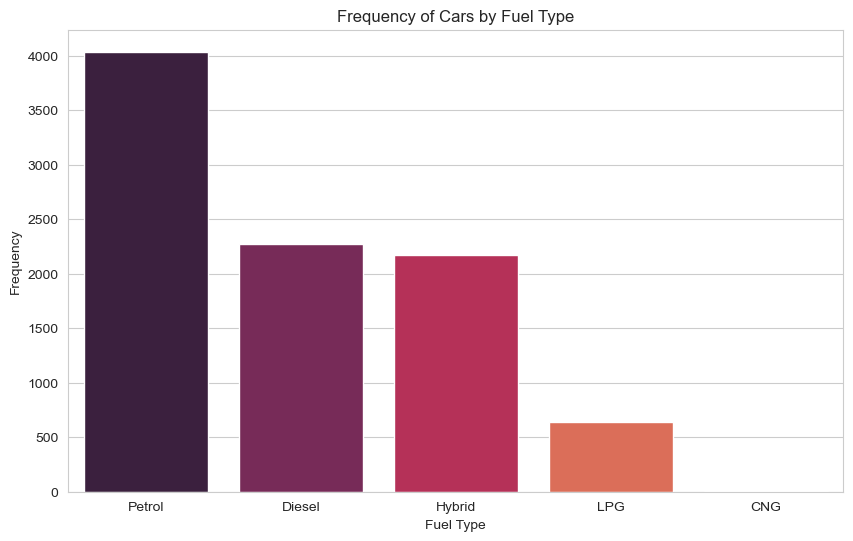

In [15]:
# plot of Frequency of Cars by Fuel Type    ------(Srikanth paritala)

# Univariate graph for the Fuel type
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel type', data=df, order = df['Fuel type'].value_counts().index, palette='rocket')
plt.title('Frequency of Cars by Fuel Type')
plt.ylabel('Frequency')
plt.xlabel('Fuel Type')
plt.show()


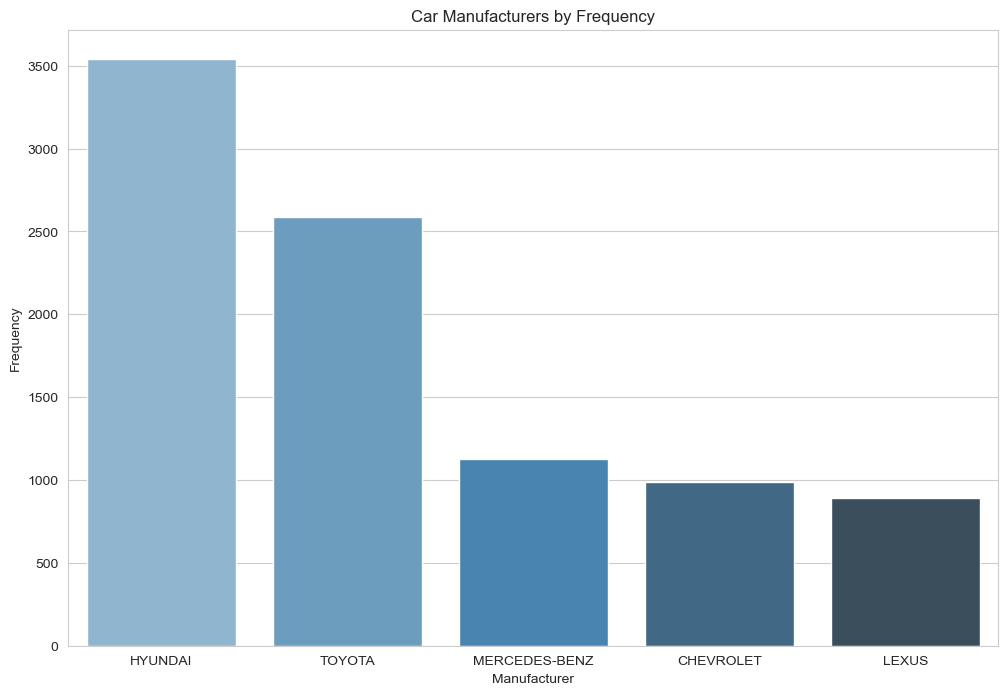

In [16]:
# plot of Car Manufacturers by Frequency        ------(Srikanth paritala)

# Univariate graph for the Manufacturer 
plt.figure(figsize=(12, 8))
top_manufacturers = df['Manufacturer'].value_counts()
sns.barplot(y=top_manufacturers.values, x=top_manufacturers.index, palette='Blues_d')
plt.title('Car Manufacturers by Frequency')
plt.ylabel('Frequency')
plt.xlabel('Manufacturer')
plt.show()


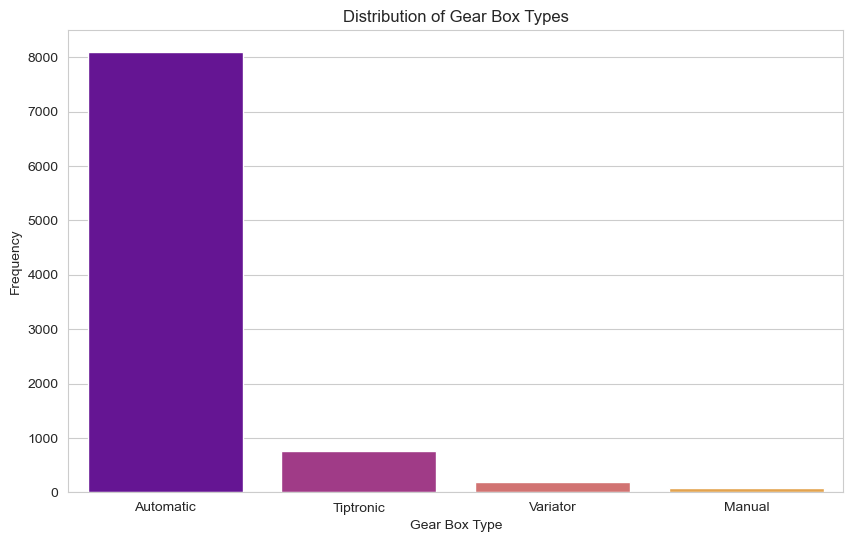

In [17]:
# plot of Distribution of Gear Box Types       ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Gear box type'], order=df['Gear box type'].value_counts().index, palette='plasma')
plt.title('Distribution of Gear Box Types')
plt.ylabel('Frequency')
plt.xlabel('Gear Box Type')
plt.show()


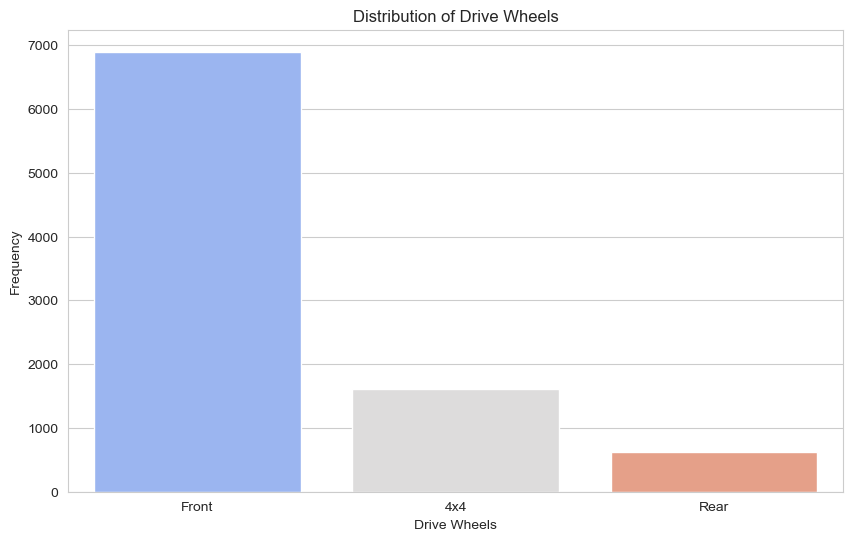

In [18]:
# plot of Distribution of Drive Wheels       ------(Srikanth paritala)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Drive wheels'], order=df['Drive wheels'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Drive Wheels')
plt.ylabel('Frequency')
plt.xlabel('Drive Wheels')
plt.show()


### Bivariate Graphs for Relationship with Price


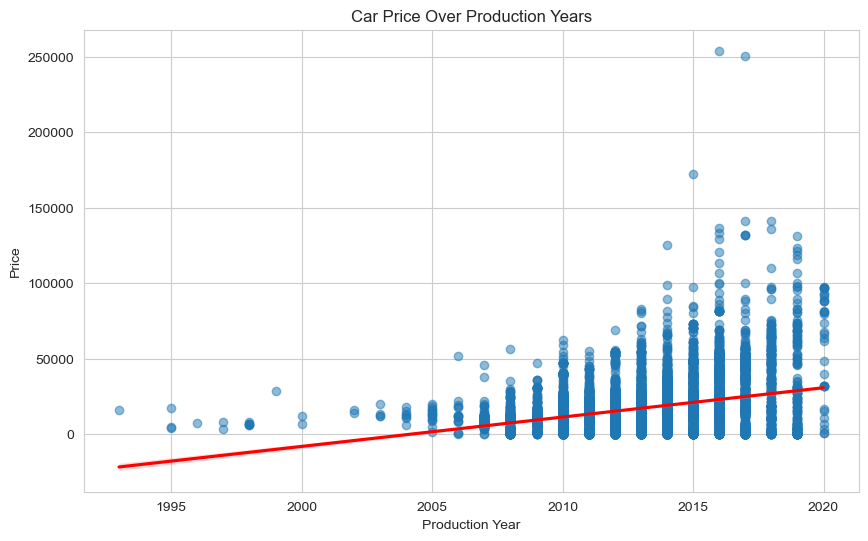

In [19]:
# plot of Distribution of Car price over Production years       ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
sns.regplot(x='Prod. year', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Car Price Over Production Years')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.show()



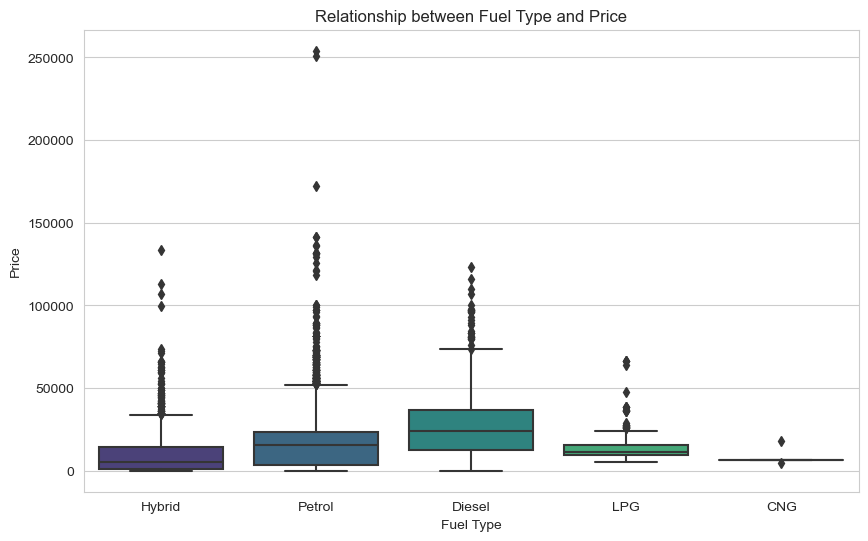

In [20]:
# plot of Relationship between Fuel Type and Price       ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'], x=df['Fuel type'], palette='viridis')
plt.title('Relationship between Fuel Type and Price')
plt.ylabel('Price')
plt.xlabel('Fuel Type')
plt.show()


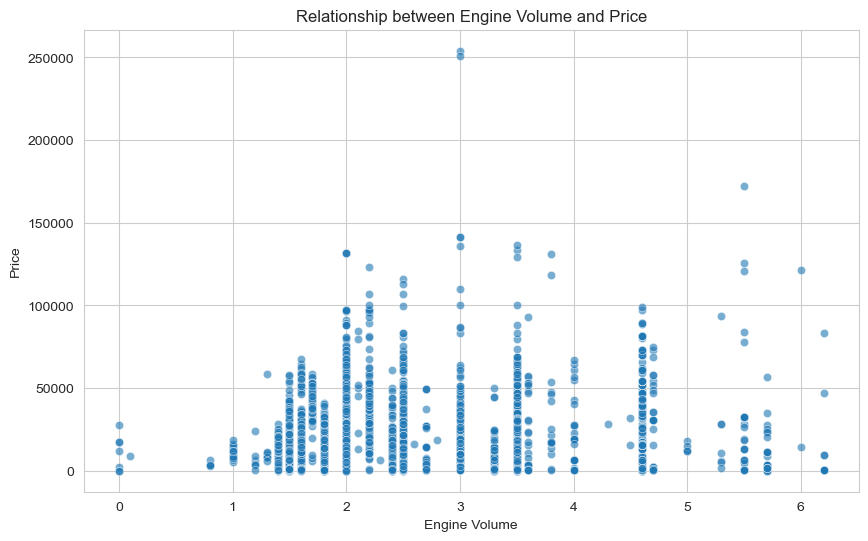

In [21]:
#  plot of Relationship between Engine Volume and Price      ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Engine'], y=df['Price'], alpha=0.6)
plt.title('Relationship between Engine Volume and Price')
plt.xlabel('Engine Volume')
plt.ylabel('Price')
plt.show()


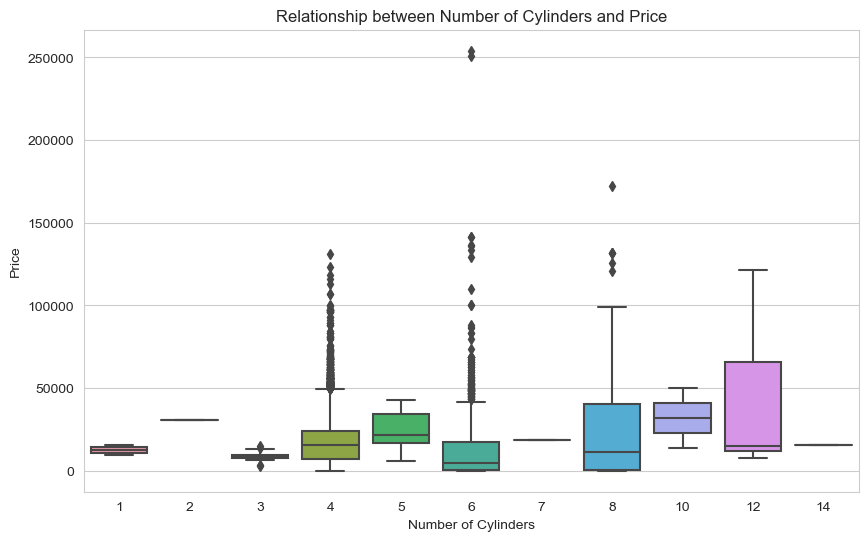

In [22]:
# plot of Relationship between Number of Cylinders and Price     ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cylinders'], y=df['Price'])
plt.title('Relationship between Number of Cylinders and Price')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.show()


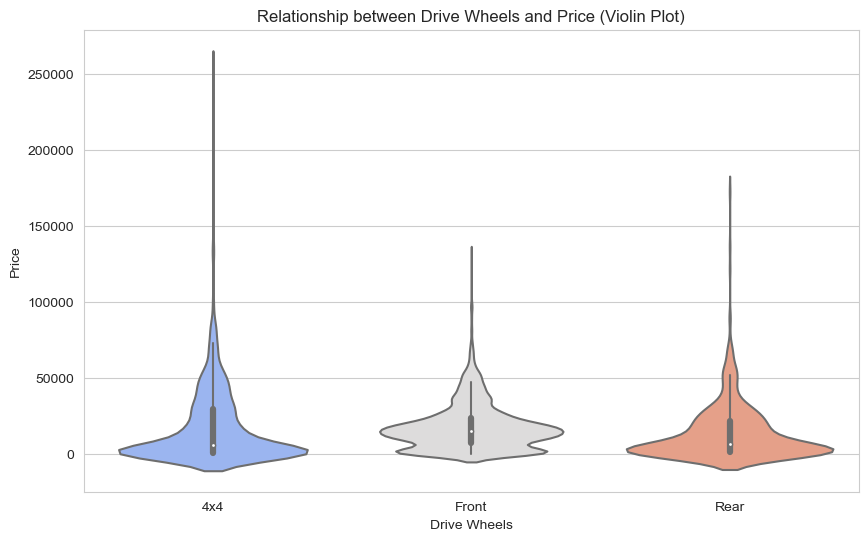

In [23]:
# plot of Relationship between Drive Wheels and Price (Violin Plot)       ------(Srikanth paritala)
 
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Drive wheels'], y=df['Price'], palette='coolwarm')
plt.title('Relationship between Drive Wheels and Price (Violin Plot)')
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.show()



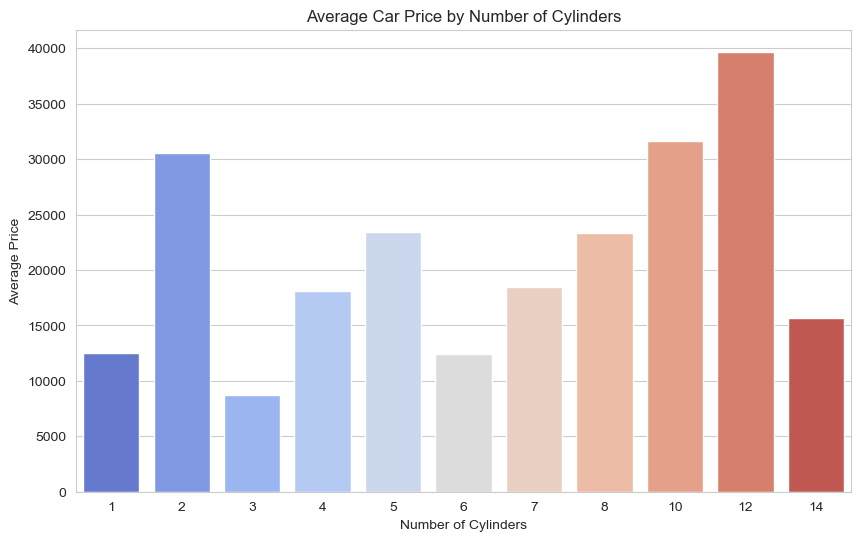

In [24]:
# plot of Average Car Price by Number of Cylinders    ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
avg_price_per_cylinder = df.groupby('Cylinders')['Price'].mean().sort_values()
sns.barplot(x=avg_price_per_cylinder.index, y=avg_price_per_cylinder.values, palette="coolwarm")
plt.title('Average Car Price by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Price')
plt.show()



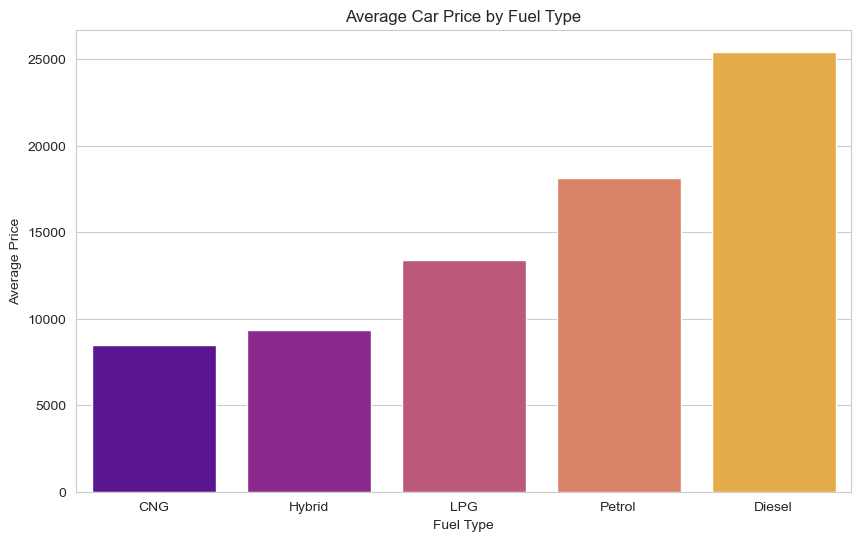

In [25]:
# plot of Average Car Price by Fuel Type       ------(Srikanth paritala)

plt.figure(figsize=(10, 6))
avg_price_per_fuel_type = df.groupby('Fuel type')['Price'].mean().sort_values()
sns.barplot(y=avg_price_per_fuel_type.values, x=avg_price_per_fuel_type.index, palette="plasma")
plt.title('Average Car Price by Fuel Type')
plt.ylabel('Average Price')
plt.xlabel('Fuel Type')
plt.show()


## Hypothesis Testing      

 Null Hypothesis: None of the features significantly affect the car's price.

 Alternative Hypothesis: At least one feature significantly affects the car's price.

## Regression Analysis

In [26]:
# Encoding categorical variables       ------(Venkata Reddy)

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_vars = ['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']
label_encoders = {var: LabelEncoder().fit(df[var]) for var in categorical_vars}
for var, encoder in label_encoders.items():
    df[var] = encoder.transform(df[var])




In [27]:
# Regression Model      ------(Venkata Reddy)

# Selecting relevant features and target variable
features = ['Levy', 'Prod. year', 'Leather interior', 'Fuel type', 'Engine', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags']
X = df[features]
y = df['Price']


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_scaled)

# Calculate the coefficients, intercept, MSE, and R^2 score
coefficients = model.coef_
intercept = model.intercept_
mse = mean_squared_error(y_test, y_pred)
r2_regression = r2_score(y_test, y_pred)

(coefficients, intercept, mse, r2_regression)


(array([ 2206.00896944,  6177.90188639,   510.22939019, -2873.41593441,
         1379.92338773, -2497.63532334,  -427.38072361,  4123.3348923 ,
         -887.85467549, -5607.31716761]),
 17528.4782311063,
 213778692.99112636,
 0.28220153489413136)

## The linear regression model to predict the price of a car based on the selected features has been fitted with the following equation:

Price=2206.008×Levy+6177.90×Prod. year+510.22×Leather interior−2873.41×Fuel type+1379.92×Engine−2497.63×Mileage−427.38×Cylinders+4123.33×Gear box type−887.85×Drive wheels−5607.31×Airbags+17528.47

However, it's important to note the model's performance indicators:

The Mean Squared Error (MSE) of the model is approximately 213,778692, indicating the average squared difference between the estimated values and the actual value.
The R-squared (R²) score is about 0.282, which means that approximately 28.2% of the variance in the car price can be explained by the model. This suggests that the model's predictive power is moderate and that there might be other factors not captured by the model that influence the price of a car.

In [28]:
# plotting OLS Regression model to predict Hypothesis Testing       ------(Venkata Reddy)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the model (intercept)
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_test_scaled_with_const = sm.add_constant(X_test_scaled)

# Fit a linear regression model using statsmodels
model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()

# Print out the statistics
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     303.0
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        14:13:36   Log-Likelihood:                -80432.
No. Observations:                7304   AIC:                         1.609e+05
Df Residuals:                    7293   BIC:                         1.610e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.753e+04    171.706    102.084      0.0

# Hypothesis Results

For all variables except for the number of cylinders, the null hypothesis is rejected, indicating that these variables have a significant relationship with the car's price. The number of cylinders does not have a significant relationship with the car's price.

# Random Forest Model

In [29]:
# ------(Venkata Reddy)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert categorical features to numeric using LabelEncoder
categorical_vars = ['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']
label_encoders = {var: LabelEncoder().fit(df[var]) for var in categorical_vars}
for var, encoder in label_encoders.items():
    df[var] = encoder.transform(df[var])

# Selecting relevant features and target variable
features = ['Levy', 'Prod. year', 'Leather interior', 'Fuel type', 'Engine', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags']
X = df[features]
y = df['Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_rm = r2_score(y_test, y_pred)

(mae, mse, r2_rm)


(5234.232118573673, 89035132.09053189, 0.7010493409755534)

# Gradient Boosting Model

In [30]:
# ------(Srikanth paritala)

from sklearn.ensemble import GradientBoostingRegressor


# Selecting relevant features and target variable
X = df[features]
y = df['Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_gbm = r2_score(y_test, y_pred)

(mae, mse, r2_gbm)


(5517.093546218693, 83544730.98312174, 0.7194843001970421)

# XG Boost

In [31]:
# ------(Srikanth paritala)

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features and target variable
X = df[features]
y = df['Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

(mae, mse, r2_xgb)


(5627.023589849863, 86309441.50633092, 0.7102013125322988)

# Stacking Classifier

In [32]:
# ------(Srikanth paritala)

from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features and target variable
X = df[features]
y = df['Price']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining base models
base_models = [
    ('linear', LinearRegression()),
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
]

# Defining the stacking regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the model
stacked_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = stacked_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_stacking = r2_score(y_test, y_pred)

(mae, mse, r2_stacking)


(5230.006077596216, 89530462.42496431, 0.6993861847984748)

# plotting r2 of all models

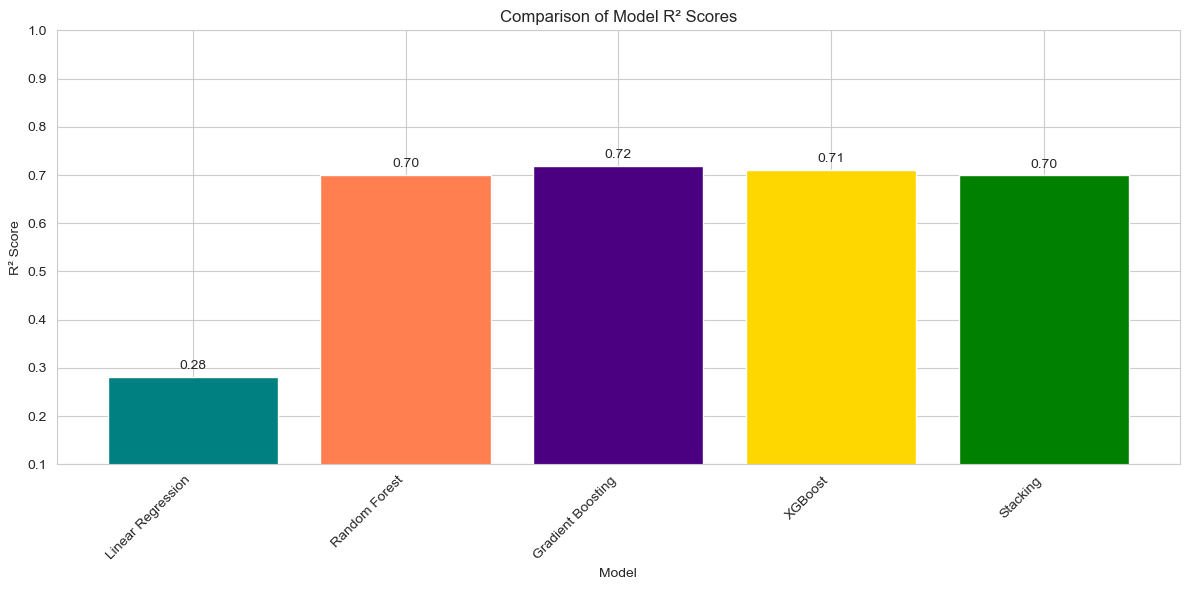

In [33]:
#  ------(Venkata Reddy) and Srikanth paritala 

import matplotlib.pyplot as plt

# Define model names and R² scores
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Stacking']
r2 = [r2_regression, r2_rm, r2_gbm, r2_xgb, r2_stacking]  

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, r2, color=['teal', 'coral', 'indigo', 'gold', 'green'])

# Add data labels to each bar
for bar, accuracy in zip(bars, r2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')

# Customize labels, title, and axes
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Model R² Scores')
plt.ylim(0.1, 1.0)  # Adjust according to the range of your R² scores
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout and show plot
plt.tight_layout()
plt.show()
